In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision as tv
from torchvision.transforms import transforms

import pickle
from tqdm import tqdm

import matplotlib.pyplot as plt

from rnn_gmm import RnnGmm
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [2]:
def get_mnist(batch_size):
  transform = transforms.Compose(
    [
      transforms.ToTensor(),
      transforms.Normalize((0.1307,), (0.30811,)),
      transforms.Lambda(lambda x: torch.flatten(x))
      # transforms.Lambda(lambda x: torch.unsqueeze(x,0))
    ]
  )

  train_set = tv.datasets.MNIST(
    'data/', train=True, download=True, transform=transform
  )
  test_set = tv.datasets.MNIST(
    'data/', train=False, download=True, transform=transform
  )

  train_loader = torch.utils.data.DataLoader(
    train_set, batch_size
  )
  test_loader = torch.utils.data.DataLoader(
    test_set, batch_size
  )

  return train_loader, test_loader, train_set, test_set
batch_size = 10
train_loader, test_loader, train_set, test_set = get_mnist(batch_size)

In [3]:
model = RnnGmm(
  28*28, 28, 6, 10, device
).to(device)
model.load_state_dict(torch.load('chkpt/rnngmm_1e-05.tar')['model_state_dict'])

<All keys matched successfully>

In [4]:
item = train_set[5][0]
item = torch.stack((train_set[0][0],train_set[1][0],train_set[1][0]))
item = item.to(device)
mask = torch.round(torch.rand(item.size(1))).to(device)

samples = model.sample(3, item, mask)

In [5]:
sample = model.sample(3)

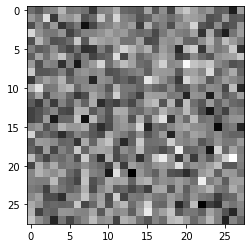

In [6]:
new = sample[0].detach().cpu().numpy()

plt.imshow(new.reshape((28,28)), cmap='gray')
plt.show()

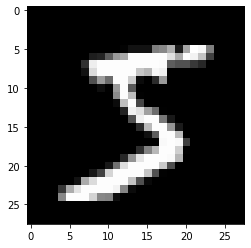

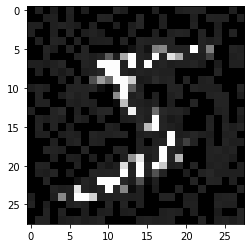

In [10]:
new = samples[0].detach().cpu().numpy()
to_impute = item[0].detach().cpu().numpy()

plt.imshow(to_impute.reshape((28,28)), cmap='gray')
plt.show()

item[0][torch.gt(1-mask, 0)] = samples[0]
to_impute = item[0].detach().cpu().numpy()

plt.imshow(to_impute.reshape((28,28)), cmap='gray')
plt.show()